# Part II - (Ford GoBike System Data)
## by (turki alothman)




## Investigation Overview


I am very interested to show the people what factor that make the rider spend more time and what feature that make people rent a bike(what factor will increase the number of individual rides). and my goal to deliver this message at clear as possible.

here some insights that will be included in this file:
- genders can be a factor that increase the number of individual rides.

- most of the individual rides are young people.

- user type(subscriber or customer ) plays a role of individual ride duration.






## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [31]:
df.dropna(inplace=True)
df.index=range(df.shape[0])
df['duration_sec'] = df['duration_sec']/60 
df['duration_sec'] = df['duration_sec'].round(decimals =0)
df['duration_sec']= df['duration_sec'].astype("int32")
df.rename(columns={"duration_sec":"duration_min"},inplace=True)
df["member_birth_year"] = df["member_birth_year"].astype("int64")

In [32]:
def barchart(serias,df,size,rotation):
    base_color = sb.color_palette()[0]

    # gets each type with its count
    na_counts = df[serias].value_counts()

    #set appropriate figure size
    plt.subplots(figsize=size)


    sb.countplot( data=df , x=serias, color=base_color , order = na_counts.index);


 

    # printing the count on the top of each bar
    for i in range (na_counts.shape[0]):
        count = na_counts[i]

    
        plt.text(i, count+10, count, ha = 'center')
    
        plt.xticks(rotation=rotation) ;
        
        
def Adapted_Bar_Chart(x,y,xlabel,ylabel,title):
    na_counts = df.groupby('user_type').mean()["duration_min"]


    base_color = sb.color_palette()[0]

    sb.barplot(data=df, x=x, y=y, color=base_color,errwidth=0)

    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    plt.title(title);
    
    for i in range (na_counts.shape[0]):
        count = na_counts[i]

    
        plt.text(i, count+0.5, str(count)[0:4], ha = 'center')
    
        

## (Visualization 1)

genders can be a factor that increase the number of individual rides ?

yes!!. Males are the most bike-riding person by a very large margin !!. Then comes the females .This big difference may explain to us that the gender is one of the factors affecting the number of bike rides.



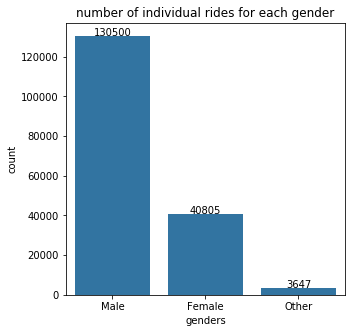

In [33]:

barchart('member_gender',df,(5,5),0);
plt.title("number of individual rides for each gender");
plt.xlabel("genders");


## (Visualization 2)
are most of the individual rides young people ?

yess! .look at the distribution of members birth years. You will see that most of the dates are in the nineties


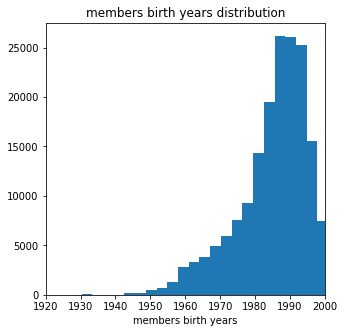

In [35]:
plt.figure(figsize=(5, 5))
minimum = df["member_birth_year"].min()
maximum = df["member_birth_year"].max()
step = (maximum-minimum)/40
bins =np.arange(minimum , maximum + step, step);
plt.hist(data=df,x="member_birth_year",bins=bins);
plt.xlabel('members birth years')
plt.xlim((1920,2000));
plt.title("members birth years distribution");

## (Visualization 3)
user type(subscriber or customer ) plays a role of individual ride duration.

yes!! . customers often prefer to take more duration. look at the avarege duration spend .



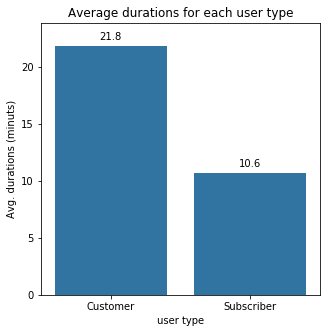

In [36]:
plt.figure(figsize=(5, 5))
Adapted_Bar_Chart('user_type','duration_min','user type','Avg. durations (minuts)',"Average durations for each user type")


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 320304 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
